# Nama : 
    - Fakhirah Bamahry (06.2019.1.90493)
    - Odila Windy Astuti H. (06.2018.1.06993)

In [39]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import seaborn as sns

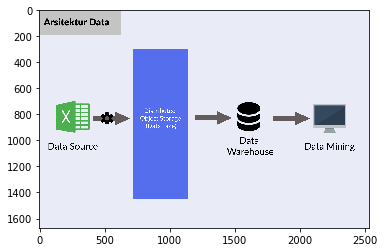

In [2]:
import matplotlib.image as mpimg 
img = mpimg.imread('Project_UAS.png') 
imgplot = plt.imshow(img) 
plt.show() 

In [3]:
data = pd.read_csv("DatasetMahasiswa.csv")
data

,Perguruan Tinggi,NPM,Nama Mahasiswa,Lulus Semester,IPK,Alamat,No. Telp
0,UNIVERSITAS BUNDA MULIA,12160013,ANNISA PERTIWI,7,3.25,Jl. Dakota IV RT. 005/08 No. 15 - Kec. Kemayor...,83890905155
1,UNIVERSITAS BUNDA MULIA,12160307,LANI PARLINA,9,2.91,Jl. Nelayan Timur RT. 007/008 No.6A Kelurahan ...,89649490185
2,UNIVERSITAS BUNDA MULIA,14160412,IRENE SAPHIRA,7,2.64,Jl. Rajawali SLT I - RT.015/002 Gunung Saharai...,81315901290
3,UNIVERSITAS BUNDA MULIA,14160447,VERA SORAYA,8,3.26,Jl. Kali Anyar X Gang V - RT. 006/06 No. 8 Kel...,83872378022
4,UNIVERSITAS BUNDA MULIA,14160449,AYUMI TAMBUNAN,7,3.52,Jl. Cempaka 1 Blok T-27 No.1-A RT.001/030 Kel....,89672079888
...,...,...,...,...,...,...,...
97,INSTITUT ILMU SOSIAL DAN MANAJEMEN STIAMI,CA116111085,RAOUL FAUZI AKBAR,9,3.10,"Gang. Musholla Nurul Anwar, No.9 B RT,001/RW00...",83883255057
98,INSTITUT ILMU SOSIAL DAN MANAJEMEN STIAMI,CA116111094,FAKHRI MUHAMMAD,7,3.71,Jl. Sei Silau LK. VI Kelurahan Tebing Kisaran ...,82277455757
99,INSTITUT ILMU SOSIAL DAN MANAJEMEN STIAMI,CA116111095,WAHYU ANGGRAINI,8,3.98,"Kp. Malaka I Rt.001/Rw.012 No.45 Kel. Rorotan,...",83895869916
100,INSTITUT ILMU SOSIAL DAN MANAJEMEN STIAMI,CA216111018,RICA DWI RAHMAWATI,7,3.83,JL.SIAGA 12 KP.BUGIS RT.011 RW.03 N0.23C CEMPA...,83890877850


In [5]:
npm = data['NPM'].unique()
nama = data['Nama Mahasiswa'].unique()
ipk = data['IPK'].unique()
univ = data['Perguruan Tinggi'].unique()
semester = data['Lulus Semester'].unique()

In [6]:
data['Alamat'].describe()

count                                                 102
unique                                                102
top       Jl. Apel 2 Blok B34/22, Pondok Makmur, Kutabaru
freq                                                    1
Name: Alamat, dtype: object

In [7]:
nama

array(['ANNISA PERTIWI', 'LANI PARLINA', 'IRENE SAPHIRA', 'VERA SORAYA',
       'AYUMI TAMBUNAN', 'FREDRIK MOSES YOHANES SANAKY', 'DEVI NATASIA',
       'VANESSA', 'MERLINE HUANGCY', 'ALICIA', 'PUTRI RAMADANIAR',
       'CHRISTI YULITA', 'ULYA QISTI RACHMANI', 'ANDRE PRANOWO',
       'ABHI SENO MONIZAR', 'MAWAR AHMALIA FAUZIAH',
       'AFIQOH NUR SOFIARNI', 'YULIAWANTI GINARIS', 'RINA KARLINA',
       'WINALDA TUZZAHRA HERWINAWAWI', 'MARLIANI DEVITA',
       'MILA MINCHATUL MAULA', 'JAKA PURNAMA', 'NOLA WAHDINI FAJRIANI',
       'DINAR SEKAR SEMESTA', 'ALMA SUCI PUTRI. A',
       'RISKA BELLA PERMATASARI', 'FUJIKA LESTARI', 'DEVI RATNADILLA',
       'EVA SORAYA', 'FITRI YANI', 'ABDINA WAHYUDI', 'CITRA DELIMA',
       'DESTIAR RAMADHANTIE. S', 'INTAN PERMATA DEWI', 'NENENG RAHMIATI',
       'PAMILA KHANSA', 'RISTAK FAIDATUN NISAK', 'SAHABUDIN LETSOIN',
       'WAHYU DWI TRIYANI', 'MEITIARA NANDA HERISETIANIS',
       'CARISSA SOTIA', 'MARWAH ANISYA', 'SUCI LIHUNA YANTO',
       'NI LUH

In [8]:
ipk

array([3.25, 2.91, 2.64, 3.26, 3.52, 3.14, 3.58, 2.5 , 3.33, 2.89, 3.32,
       3.15, 3.16, 2.94, 1.33, 3.4 , 3.7 , 3.74, 3.2 , 3.6 , 3.34, 3.39,
       2.86, 3.51, 3.59, 3.28, 3.23, 3.8 , 3.17, 3.66, 3.44, 3.71, 3.62,
       3.56, 3.27, 3.3 , 3.55, 3.91, 3.11, 3.22, 3.5 , 3.29, 3.38, 3.35,
       3.49, 2.79, 3.31, 3.84, 3.63, 3.78, 3.48, 3.68, 3.37, 3.42, 3.53,
       3.75, 3.64, 3.54, 3.41, 3.  , 2.76, 3.67, 2.97, 3.87, 3.1 , 3.98,
       3.83, 3.24])

In [9]:
univ

array(['UNIVERSITAS BUNDA MULIA', 'UNIVERSITAS INDRAPRASTA PGRI',
       'UNIVERSITAS BAKRIE', 'UNIVERSITAS TRILOGI',
       'UNIVERSITAS PRASETIYA MULYA', 'INSTITUT TEKNOLOGI INDONESIA',
       'INSTITUT KEU PERBANKAN DAN INF ASIA PERBANAS',
       'INSTITUT BISNIS NUSANTARA',
       'INSTITUT TEKNOLOGI DAN BISNIS KALBIS',
       'INSTITUT BISNIS DAN MULTIMEDIA ASMI JAKARTA',
       ' INSTITUT ILMU SOSIAL DAN MANAJEMEN STIAMI'], dtype=object)

In [10]:
semester

array([ 7,  9,  8, 10], dtype=int64)

In [11]:
data.head()

,Perguruan Tinggi,NPM,Nama Mahasiswa,Lulus Semester,IPK,Alamat,No. Telp
0,UNIVERSITAS BUNDA MULIA,12160013,ANNISA PERTIWI,7,3.25,Jl. Dakota IV RT. 005/08 No. 15 - Kec. Kemayor...,83890905155
1,UNIVERSITAS BUNDA MULIA,12160307,LANI PARLINA,9,2.91,Jl. Nelayan Timur RT. 007/008 No.6A Kelurahan ...,89649490185
2,UNIVERSITAS BUNDA MULIA,14160412,IRENE SAPHIRA,7,2.64,Jl. Rajawali SLT I - RT.015/002 Gunung Saharai...,81315901290
3,UNIVERSITAS BUNDA MULIA,14160447,VERA SORAYA,8,3.26,Jl. Kali Anyar X Gang V - RT. 006/06 No. 8 Kel...,83872378022
4,UNIVERSITAS BUNDA MULIA,14160449,AYUMI TAMBUNAN,7,3.52,Jl. Cempaka 1 Blok T-27 No.1-A RT.001/030 Kel....,89672079888


In [12]:
import mysql.connector
db = mysql.connector.connect(host="localhost",user="root",passwd="")
cursor = db.cursor()

In [13]:
cursor.execute("DROP DATABASE if exists datamhs")
cursor.execute("CREATE DATABASE datamhs")
cursor.execute("use datamhs")

In [14]:
cursor.execute("DROP TABLE if exists univ")
cursor.execute("DROP TABLE if exists mahasiswa")
cursor.execute("DROP TABLE if exists data_mhs")
cursor.execute("create table univ(id_univ int primary key, nama_univ varchar(50) not null)")
cursor.execute("create table mahasiswa(id_mhs int primary key, npm int not null, nama varchar(255) not null, alamat varchar(255) not null, no_tlp int not null)")
cursor.execute("create table data_mhs(id_data int primary key, semester int not null, ipk int not null, id_univ int not null, id_mhs int not null)")

In [15]:
univ = []
mahasiswa = []
data_mhs = []

for i, j in data.iterrows():
    if j[0] not in univ:
        univ.append(j[0])
    
    u = -1
    for index,values in enumerate(univ):
        if values == j[0]:
            u = index+1
            break
    
    
    if [j[1], j[2], j[5], j[6]] not in mahasiswa:
        mahasiswa.append([j[1], j[2], j[5], j[6]])
    
    m = -1
    for index, values in enumerate(mahasiswa):
        if values[0] == j[1]:
            m = index+1
            break
    
    if [j[3], j[4], u, m] not in data_mhs:
        data_mhs.append([j[3], j[4], u, m])

In [16]:
final=apriori(data_mhs,min_support=0.5,min_confidence=0.7,min_left=1.2,min_length=2)
final_mhs=list(final)

In [17]:
final

<generator object apriori at 0x00000232B4031048>

In [18]:
cursor.execute("delete from univ")
for index, i in enumerate(univ): 
    cursor.execute("INSERT INTO UNIV VALUES(" + str(index+1) + ", '" + str(i) + "')")
    db.commit

In [19]:
cursor.execute("SELECT * FROM UNIV")

univ = []
for row in cursor.fetchall():
    univ.append(row)
print("                                           - Nama Perguruan Tinggi -                                    ")
print(univ)
print("------------------------------------------------------------------------------------------------------------------------")

                                           - Nama Perguruan Tinggi -                                    
[(1, 'UNIVERSITAS BUNDA MULIA'), (2, 'UNIVERSITAS INDRAPRASTA PGRI'), (3, 'UNIVERSITAS BAKRIE'), (4, 'UNIVERSITAS TRILOGI'), (5, 'UNIVERSITAS PRASETIYA MULYA'), (6, 'INSTITUT TEKNOLOGI INDONESIA'), (7, 'INSTITUT KEU PERBANKAN DAN INF ASIA PERBANAS'), (8, 'INSTITUT BISNIS NUSANTARA'), (9, 'INSTITUT TEKNOLOGI DAN BISNIS KALBIS'), (10, 'INSTITUT BISNIS DAN MULTIMEDIA ASMI JAKARTA'), (11, ' INSTITUT ILMU SOSIAL DAN MANAJEMEN STIAMI')]
------------------------------------------------------------------------------------------------------------------------


In [20]:
cursor.execute("delete from mahasiswa")
for i,j in enumerate(mahasiswa):
    cursor.execute("INSERT INTO MAHASISWA VALUES(" + str(i+1) + ", '" + str(j[0]) + "', '" + str(j[1]).replace("'",'') + "', '" + str(j[2]) + "', '" + str(j[3]) + "')")
    db.commit

In [21]:
cursor.execute("SELECT * FROM MAHASISWA")

for row in cursor.fetchall():
    mahasiswa.append(row)
print("                                                    - DATA MAHASISWA -                                    ")
print(mahasiswa)
print("------------------------------------------------------------------------------------------------------------------------")

                                                    - DATA MAHASISWA -                                    
[['12160013', 'ANNISA PERTIWI', 'Jl. Dakota IV RT. 005/08 No. 15 - Kec. Kemayoran Kelurahan Kebon Kosong', 83890905155], ['12160307', 'LANI PARLINA', 'Jl. Nelayan Timur RT. 007/008 No.6A Kelurahan Pinangsia - Kec. Taman Sari', 89649490185], ['14160412', 'IRENE SAPHIRA', 'Jl. Rajawali SLT I - RT.015/002 Gunung Saharai Utara Sawah Besar', 81315901290], ['14160447', 'VERA SORAYA', 'Jl. Kali Anyar X Gang V - RT. 006/06 No. 8 Kelurahan Kalianyar - Kec. Tambora', 83872378022], ['14160449', 'AYUMI TAMBUNAN', 'Jl. Cempaka 1 Blok T-27 No.1-A RT.001/030 Kel. Teluk Pulung - Bekasi Utara', 89672079888], ['14160450', 'FREDRIK MOSES YOHANES SANAKY', 'Jl. Lambok V No. 103 - RT.002/007 Cibodasari', 81284938943], ['11170184', 'DEVI NATASIA', 'Jln. Pademangan Timur 7 Gg. 37 No. 8 RT.005 / 010', 89668583514], ['11170185', 'VANESSA', 'Bantar Kawung Kel. Nagasari RT. 002/005', 89669981222], ['14170316

In [22]:
cursor.execute("delete from data_mhs")
for i,j in enumerate(data_mhs):
    cursor.execute("INSERT INTO DATA_MHS VALUES(" + str(i+1) + ", '" + str(j[0]) + "'," + str(j[1]) + "," + str(j[2]) + "," + str(j[3]) + ")")
    db.commit
#  print("INSERT INTO DATA_MHS VALUES(" + str(i+1) + ", '" + str(j[0]) + "'," + str(j[1]) + "," + str(j[2]) + "," + str(j[3]) + ")")

In [23]:
cursor.execute("SELECT * FROM DATA_MHS")

for row in cursor.fetchall():
    data_mhs.append(row)
print("                                           - LIST DATA -                                    ")
print(data_mhs)
print("------------------------------------------------------------------------------------------------------------------------")

                                           - LIST DATA -                                    
[[7, 3.25, 1, 1], [9, 2.91, 1, 2], [7, 2.64, 1, 3], [8, 3.26, 1, 4], [7, 3.52, 1, 5], [7, 3.14, 1, 6], [7, 3.58, 1, 7], [8, 2.5, 1, 8], [8, 3.33, 1, 9], [8, 2.89, 1, 10], [9, 3.32, 1, 11], [7, 3.15, 1, 12], [7, 3.16, 2, 13], [7, 2.94, 2, 14], [10, 1.33, 2, 15], [7, 3.4, 2, 16], [8, 3.7, 3, 17], [8, 3.74, 3, 18], [8, 3.2, 3, 19], [8, 3.6, 3, 20], [8, 3.34, 3, 21], [8, 3.26, 3, 22], [7, 3.16, 3, 23], [7, 3.33, 3, 24], [9, 3.39, 4, 25], [10, 2.86, 4, 26], [7, 3.51, 4, 27], [7, 3.59, 4, 28], [7, 3.28, 4, 29], [8, 3.23, 4, 30], [8, 3.8, 4, 31], [8, 3.17, 4, 32], [7, 3.66, 4, 33], [8, 3.66, 4, 34], [7, 3.7, 4, 35], [7, 3.44, 4, 36], [7, 3.71, 4, 37], [7, 3.62, 4, 38], [7, 3.56, 4, 39], [7, 3.27, 4, 40], [8, 3.3, 4, 41], [8, 3.55, 4, 42], [7, 3.44, 4, 43], [7, 3.91, 4, 44], [10, 3.11, 5, 45], [7, 3.22, 5, 46], [8, 3.5, 5, 47], [7, 3.7, 5, 48], [8, 3.29, 5, 49], [7, 3.38, 6, 50], [7, 3.62, 6, 51], [7, 

In [73]:
cursor.execute('''SELECT univ.nama_univ,mahasiswa.npm,mahasiswa.nama,semester,ipk 
                FROM data_mhs
                join univ on data_mhs.id_univ = univ.id_univ
                join mahasiswa on data_mhs.id_mhs = mahasiswa.id_mhs
                group by mahasiswa.nama
                order by mahasiswa.nama ASC
                ''')
data_mhs =[]
for row in cursor.fetchall():
    data_mhs.append(row)
np_data_mhs = np.array(data_mhs)
print("                                         - DATA MAHASISWA -                                    ")
data = pd.DataFrame([x for x in np_data_mhs[:,:]],columns=['univ','npm','nama','semester','ipk'])
data.index = np.arange(1,len(data)+1)
data

                                         - DATA MAHASISWA -                                    


,univ,npm,nama,semester,ipk
1,UNIVERSITAS TRILOGI,16104014,ABDINA WAHYUDI,8,3
2,UNIVERSITAS INDRAPRASTA PGRI,2147483647,ABHI SENO MONIZAR,10,1
3,UNIVERSITAS BAKRIE,1161001069,AFIQOH NUR SOFIARNI,8,4
4,INSTITUT KEU PERBANKAN DAN INF ASIA PERBANAS,1612000135,AFLAKULLOH AL MUWAFFAQ,8,4
5,UNIVERSITAS PRASETIYA MULYA,135161002,ALFIENA PUJI KUSUMA DEWANTI,7,4
...,...,...,...,...,...
98,UNIVERSITAS TRILOGI,16105039,WAHYU DWI TRIYANI,7,3
99,UNIVERSITAS BAKRIE,1161003239,WINALDA TUZZAHRA HERWINAWAWI,8,4
100,INSTITUT TEKNOLOGI DAN BISNIS KALBIS,2016102908,YOVI FRIANGGA,7,3
101,UNIVERSITAS BAKRIE,1161002046,YULIAWANTI GINARIS,8,4


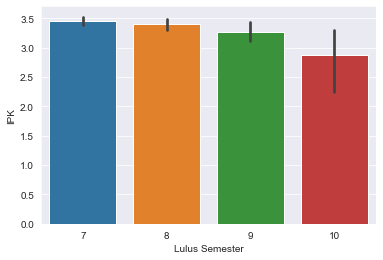

In [75]:
sns.barplot(x=data['Lulus Semester'], y=data['IPK'], data=data)